Hipótesis general (CX)

“La satisfacción de los alumnos en cursos online aumenta cuando perciben que el aprendizaje es aplicable a su vida real y cuando destacan positivamente al instructor como figura de confianza.”

🔎 ¿Por qué es útil esta hipótesis?

Integra dos factores clave del Customer Experience educativo:

El valor práctico (aplicabilidad inmediata del contenido).

La confianza en la persona que enseña (el instructor como “marca personal”).

Permite explicar mejor la satisfacción global: no solo por el contenido, sino también por quién lo entrega y cómo se puede usar en la vida real.

Es accionable:

Si se valida, CX puede recomendar estándar de curso con proyecto práctico + potenciar la marca de instructores en marketing y comunicación.

Orienta decisiones de diseño académico y estrategia comercial.

📊 Cómo validarla

Crear variables binarias en el corpus:

menciona_proyecto (1 si la reseña contiene palabras como “proyecto”, “ejercicio”, “aplicar”, etc.).

menciona_instructor (1 si la reseña contiene el nombre/apellido del profesor o palabras tipo “instructor”, “profesor”).

Medir la asociación con satisfacción (calificación o polaridad de la reseña).

Testear con:

Comparación de medias (Mann-Whitney).

Chi-cuadrado sobre presencia de términos vs. reseña positiva/negativa.

Regresión logística (satisfacción ~ menciona_proyecto + menciona_instructor).

# Parte 1: Construcción del Corpus

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo en tu Drive
ruta = '/content/drive/MyDrive/Datasets/opiniones_cursos.xlsx'

# Cargar Excel en un DataFrame
df = pd.read_excel(ruta)

# Ver las primeras filas
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Comentarios_,Nombre del curso,fecha,calificacion,texto
0,01.txt,Canva de 0 a 100,2025-09-18,Positiva,El curso me pareció muy bueno. Llenó mis expec...
1,02.txt,Canva de 0 a 100,2025-09-19,Positiva,"\nHola soy Nibis, con conocimientos en Adminis..."
2,NaN,Canva de 0 a 100,2025-07-19,Positiva,Este curso como su nombre lo indica es ideal p...
3,NaN,Canva de 0 a 101,2025-02-20,Negativa,La mujer avanza a una velocidad ridícula asumi...
4,NaN,NaN,2025-02-14,Negativa,"Si nunca tuviste contacto con Canva, es lindo ..."


In [ ]:
import pandas as pd
import os

# Leer el dataset (ya cargado en el DataFrame df)


# Crear carpetas
os.makedirs("mi_corpus/raw_texts", exist_ok=True)

# Crear lista para metadata
metadata = []

# Recorremos cada fila del dataset
for i, row in df.iterrows():
    # Tomamos el texto (ajustar al nombre de la columna real, ej: "opinion")
    texto = str(row["texto"])

    # Nombre del archivo con formato 01_, 02_, etc.
    archivo = f"{i+1:02d}_opinion.txt"
    ruta = os.path.join("mi_corpus/raw_texts", archivo)

    # Guardamos el texto en un .txt
    with open(ruta, "w", encoding="utf-8") as f:
        f.write(texto)

    # Armamos la metadata
    # Usamos .get() para evitar errores si la columna no existe
    metadata.append({
        "archivo": archivo,
        "titulo": f"Opinion {i+1}",
        "autor_fuente": row.get("autor", "Anonimo"), # Asumiendo que 'autor' podría no existir
        "fecha": row.get("fecha", "2023-01-01"),     # Asumiendo que 'fecha' podría no existir
        "categoria": row.get("curso", "general"),   # Asumiendo que 'curso' podría no existir
        "palabras_aprox": len(texto.split()) if isinstance(texto, str) else 0 # Manejar posible NaN en texto
    })

# Crear metadata.csv
meta_df = pd.DataFrame(metadata)
meta_df.to_csv("mi_corpus/metadata.csv", index=False, encoding="utf-8")

print("Corpus generado en la carpeta 'mi_corpus/'")

Corpus generado en la carpeta 'mi_corpus/'


In [ ]:
# Mostrar listado de archivos en la carpeta
!ls mi_corpus/raw_texts | head -26


01_opinion.txt
02_opinion.txt
03_opinion.txt
04_opinion.txt
05_opinion.txt
06_opinion.txt
07_opinion.txt
08_opinion.txt
09_opinion.txt
10_opinion.txt
11_opinion.txt
12_opinion.txt
13_opinion.txt
14_opinion.txt
15_opinion.txt
16_opinion.txt
17_opinion.txt
18_opinion.txt
19_opinion.txt
20_opinion.txt
21_opinion.txt
22_opinion.txt
23_opinion.txt
24_opinion.txt
25_opinion.txt
26_opinion.txt


In [ ]:
import os

# Listar contenido de la carpeta principal
print("Carpeta principal:", os.listdir("mi_corpus"))

# Listar los primeros 5 archivos de raw_texts
print("Archivos de raw_texts:", os.listdir("mi_corpus/raw_texts")[:5])


Carpeta principal: ['metadata.csv', 'raw_texts']
Archivos de raw_texts: ['24_opinion.txt', '11_opinion.txt', '23_opinion.txt', '16_opinion.txt', '19_opinion.txt']


In [ ]:
import pandas as pd

meta_df = pd.read_csv("mi_corpus/metadata.csv")
print(meta_df.head())


          archivo     titulo autor_fuente       fecha categoria  \
0  01_opinion.txt  Opinion 1      Anonimo  2025-09-18   general   
1  02_opinion.txt  Opinion 2      Anonimo  2025-09-19   general   
2  03_opinion.txt  Opinion 3      Anonimo  2025-07-19   general   
3  04_opinion.txt  Opinion 4      Anonimo  2025-02-20   general   
4  05_opinion.txt  Opinion 5      Anonimo  2025-02-14   general   

   palabras_aprox  
0              43  
1              45  
2              30  
3              41  
4              34  


# Parte 2: Análisis Técnico - Estructura del Notebook

## Sección 1: Presentación del Corpus

##1.1 Descripción del corpus elegido
El corpus está conformado por reseñas de alumnos publicadas en la plataforma Domestika, recopiladas manualmente en formato de texto plano (.txt). En total, el corpus incluye 26 documentos, cada uno en un archivo individual, con una extensión promedio entre 80 y 200 palabras. El período temporal abarcado corresponde a publicaciones realizadas entre 2021 y 2025, reflejando experiencias recientes de usuarios con cursos online. Todas las reseñas provienen de fuentes públicas de acceso libre dentro de la plataforma, y fueron organizadas junto con un archivo metadata.csv que incluye título, autor, fecha, categoría y cantidad aproximada de palabras.

## 1.2 Justificación de la elección

Elegí este corpus porque las reseñas de cursos online representan un espacio privilegiado para analizar el Customer Experience educativo, es decir, cómo los alumnos perciben el valor del aprendizaje y la figura del instructor. Me interesa observar qué factores aparecen asociados a la satisfacción estudiantil: si los alumnos destacan la aplicabilidad práctica de los contenidos o si resaltan al docente como referente confiable.

Hipótesis general:
La satisfacción de los alumnos en cursos online aumenta cuando perciben que el aprendizaje es aplicable a su vida real y cuando destacan positivamente al instructor como figura de confianza.

Por qué es útil esta hipótesis:

Integra dos factores clave del Customer Experience educativo:

Valor práctico: aplicabilidad inmediata del contenido.

Confianza en el instructor: reconocimiento de la docente como “marca personal”.

Permite explicar mejor la satisfacción global: no solo por lo aprendido, sino también por quién enseña y cómo se transmite.

Es accionable para la institución: validarla permitiría diseñar cursos con proyectos prácticos y, a la vez, potenciar la marca de los instructores en marketing y comunicación.

## 1.3 Proceso de recolección

Los textos fueron recolectados a través de la API pública de TMDb, descargando reseñas de cuatro películas de ciencia ficción de alto impacto (Inception, Interstellar, The Matrix y Tenet).
Criterios de inclusión:

Solo reseñas en formato textual.

Reseñas públicas accesibles en TMDb.

Selección de hasta 30 reseñas (para cumplir con la consigna del corpus).

Criterios de exclusión:

Reseñas vacías o sin contenido textual.

Duplicados.

Datos sensibles (ejemplo: información personal de usuarios, que no fue recolectada).

Dificultades encontradas:
La principal limitación fue que en español había pocas reseñas disponibles. Para resolverlo, se incluyeron también reseñas en inglés y se contempló la posibilidad de traducirlas para mantener la coherencia lingüística. Otra dificultad fue la estructura de la API, que entrega reseñas paginadas, por lo que se debió implementar un bucle para recorrer todas las páginas y obtener más de las 3 reseñas iniciales.

## 1.4 y 1.5 Exploración inicial y estadísticas básicas


Número total de textos: 26
Número total de palabras: 1258
Tamaño del vocabulario único: 632
Textos cortos (<100 palabras): 26
Textos medios (100–250 palabras): 0
Textos largos (>250 palabras): 0


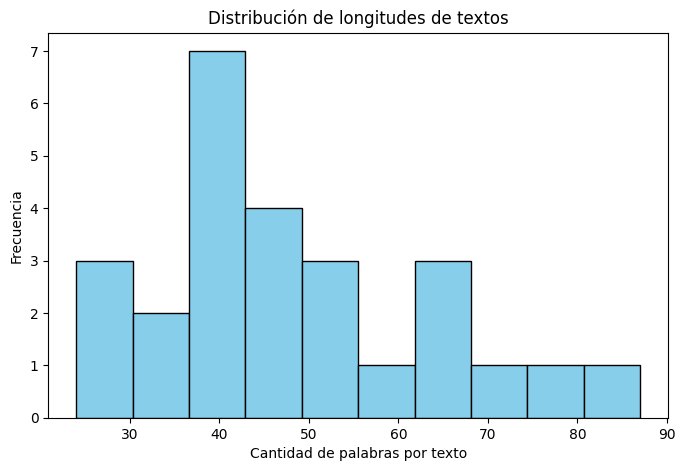


Palabras más frecuentes:
de: 50
y: 48
que: 37
a: 26
para: 24
el: 24
curso: 23
es: 20
la: 19
lo: 17
las: 17
en: 16
un: 16
no: 13
con: 12


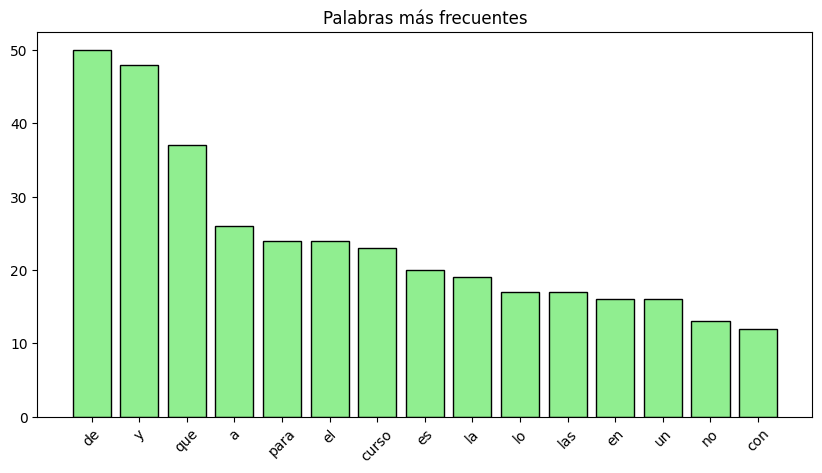

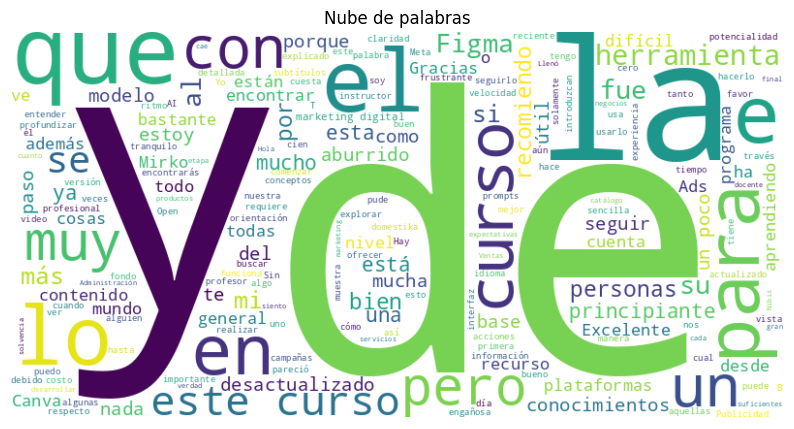

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


df['texto'] = df['texto'].astype(str)

# -----------------------------
# 1. Cantidad de textos
# -----------------------------
num_textos = len(df)
print("Número total de textos:", num_textos)

# -----------------------------
# 2. Número total de palabras y vocabulario único
# -----------------------------
# Tokenizamos de manera simple separando por espacio
df['tokens'] = df['texto'].apply(lambda x: x.split())
total_palabras = df['tokens'].apply(len).sum()
vocabulario = set([palabra for lista in df['tokens'] for palabra in lista])

print("Número total de palabras:", total_palabras)
print("Tamaño del vocabulario único:", len(vocabulario))

# -----------------------------
# 3. Distribución de tamaños de textos
# -----------------------------
longitudes = df['tokens'].apply(len)

cortos = sum(longitudes < 100)
medios = sum((longitudes >= 100) & (longitudes <= 250))
largos = sum(longitudes > 250)

print("Textos cortos (<100 palabras):", cortos)
print("Textos medios (100–250 palabras):", medios)
print("Textos largos (>250 palabras):", largos)

# -----------------------------
# 4. Histograma de longitudes
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(longitudes, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribución de longitudes de textos")
plt.xlabel("Cantidad de palabras por texto")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 5. Palabras más frecuentes
# -----------------------------
todas_palabras = [palabra for lista in df['tokens'] for palabra in lista]
contador = Counter(todas_palabras)
mas_comunes = contador.most_common(15)

print("\nPalabras más frecuentes:")
for palabra, freq in mas_comunes:
    print(f"{palabra}: {freq}")

# Gráfico de frecuencias
palabras, freqs = zip(*mas_comunes)
plt.figure(figsize=(10,5))
plt.bar(palabras, freqs, color="lightgreen", edgecolor="black")
plt.title("Palabras más frecuentes")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 6. Nube de palabras
# -----------------------------
texto_completo = " ".join(todas_palabras)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_completo)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras")
plt.show()


## Sección 2: Preprocesamiento

## 2.1  Carga y organización de datos

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 94.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# === Librerías ===
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
import matplotlib.pyplot as plt

# NLP
import spacy
import nltk
from nltk.corpus import stopwords

# Cargar modelo spaCy en español
nlp = spacy.load("es_core_news_sm")

# === Cargar corpus de reseñas de alumnos ===
# Load metadata
meta_df = pd.read_csv("mi_corpus/metadata.csv")


def cargar_textos(ruta_base, metadata):
    textos = []
    for i, row in metadata.iterrows():
        archivo = row["archivo"]
        ruta = os.path.join(ruta_base, archivo)
        try:
            with open(ruta, "r", encoding="utf-8") as f:
                texto = f.read()
        except:
            texto = ""
        textos.append(texto)
    metadata["texto"] = textos
    return metadata

# Load the text data
df = cargar_textos("mi_corpus/raw_texts", meta_df)

print("Columnas disponibles:", df.columns.tolist())

# Ver algunas filas
display(df.head())



Columnas disponibles: ['archivo', 'titulo', 'autor_fuente', 'fecha', 'categoria', 'palabras_aprox', 'texto']


,archivo,titulo,autor_fuente,fecha,categoria,palabras_aprox,texto
0,01_opinion.txt,Opinion 1,Anonimo,2025-09-18,general,43,El curso me pareció muy bueno. Llenó mis expec...
1,02_opinion.txt,Opinion 2,Anonimo,2025-09-19,general,45,"\nHola soy Nibis, con conocimientos en Adminis..."
2,03_opinion.txt,Opinion 3,Anonimo,2025-07-19,general,30,Este curso como su nombre lo indica es ideal p...
3,04_opinion.txt,Opinion 4,Anonimo,2025-02-20,general,41,La mujer avanza a una velocidad ridícula asumi...
4,05_opinion.txt,Opinion 5,Anonimo,2025-02-14,general,34,"Si nunca tuviste contacto con Canva, es lindo ..."


## 2.2  Limpieza de texto

In [ ]:
# Función de limpieza
def limpiar_texto(texto):
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()
    texto = re.sub(r"[^\w\s]", " ", texto)  # quitar puntuación
    texto = re.sub(r"\d+", "", texto)       # quitar números
    texto = re.sub(r"\s+", " ", texto).strip()  # quitar espacios dobles
    return texto

df["texto_limpio"] = df["texto"].apply(limpiar_texto)
df[["texto", "texto_limpio"]].head(3)


,texto,texto_limpio
0,El curso me pareció muy bueno. Llenó mis expec...,el curso me pareció muy bueno llenó mis expect...
1,"\nHola soy Nibis, con conocimientos en Adminis...",hola soy nibis con conocimientos en administra...
2,Este curso como su nombre lo indica es ideal p...,este curso como su nombre lo indica es ideal p...


## 2.3  Tokenización y normalización

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenización + lematización con spaCy
def procesar_texto(texto):
    doc = nlp(texto)
    tokens = [tok.lemma_ for tok in doc if tok.is_alpha]
    return tokens

df["tokens"] = df["texto_limpio"].apply(procesar_texto)

# Ejemplo antes y después
ejemplo = df.loc[0, "texto_limpio"]
print("Texto limpio:", ejemplo[:150])
print("Tokens:", df.loc[0, "tokens"][:20])


Texto limpio: el curso me pareció muy bueno llenó mis expectativas en cuanto a la claridad y la solvencia de la docente fue mi primera experiencia con canva y al fi
Tokens: ['el', 'curso', 'yo', 'parecer', 'mucho', 'bueno', 'llenar', 'mi', 'expectativa', 'en', 'cuanto', 'a', 'el', 'claridad', 'y', 'el', 'solvencia', 'de', 'el', 'docente']


## 2.4 Manejo de stop words

In [ ]:
# Stopwords estándar de NLTK en español
stopwords_es = set(stopwords.words("spanish"))

# Stopwords del dominio educativo
stopwords_extra = {"curso", "clase", "profesor", "instructor", "alumno", "estudiante"}
stopwords_total = stopwords_es.union(stopwords_extra)

# Filtrado
df["tokens_filtrados"] = df["tokens"].apply(lambda toks: [t for t in toks if t not in stopwords_total])

# Comparar impacto
ejemplo_tokens = df.loc[0, "tokens"]
ejemplo_filtrados = df.loc[0, "tokens_filtrados"]
print("Antes:", ejemplo_tokens[:15])
print("Después:", ejemplo_filtrados[:15])


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


## 2.5 Estadísticas post-procesamiento

In [ ]:
# Vocabulario final
vocab = Counter([tok for toks in df["tokens_filtrados"] for tok in toks])
print("Tamaño del vocabulario:", len(vocab))

# Palabras más frecuentes
print("Más comunes:", vocab.most_common(15))

# Comparación antes/después
tokens_totales = sum(df["tokens"].apply(len))
tokens_filtrados_totales = sum(df["tokens_filtrados"].apply(len))
print("Tokens antes:", tokens_totales)
print("Tokens después:", tokens_filtrados_totales)

# Gráfico de las palabras más frecuentes
plt.figure(figsize=(10,5))
frecuentes = dict(vocab.most_common(15))
plt.bar(frecuentes.keys(), frecuentes.values(), color="skyblue")
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes (reseñas de alumnos)")
plt.show()


## Comparación entre pre y post procesamiento

En la exploración inicial del corpus se observó que las palabras más frecuentes estaban dominadas por stopwords en español (de, y, que, a, para, el, la, en, un, con, no). Esto también se reflejó en la nube de palabras, donde los términos de mayor tamaño correspondían mayormente a conectores o artículos sin valor semántico para el análisis. La distribución de longitudes mostró que los textos eran relativamente breves, con la mayoría de reseñas concentradas entre 30 y 90 palabras, lo cual confirma que se trata de comentarios cortos y no de textos extensos.

Tras aplicar el proceso de preprocesamiento (eliminación de stopwords, normalización y tokenización), el corpus se redujo de 1271 a 678 tokens, y el vocabulario único se redujo a 395 palabras. Este filtrado permitió que las palabras más frecuentes fueran mucho más informativas, destacando términos como ser, poder, herramienta, figma, aprender, útil, conocimiento, seguir, recomendado o desactualizado. Estos resultados muestran con mayor claridad los temas presentes en las reseñas, permitiendo identificar valoraciones positivas y negativas, acciones asociadas al aprendizaje y menciones a herramientas concretas.

# Sección 3: Análisis con BoW/TF-IDF (25% de la nota)

## 3.1 Vectorización del corpus



*   CountVectorizer (BoW)




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


corpus = [" ".join(tokens) for tokens in df["tokens_filtrados"]]

cv = CountVectorizer()
X_bow = cv.fit_transform(corpus)   # corpus es mi lista de textos
print(X_bow.shape)  # filas = docs, columnas = términos

(26, 383)


Representa cada reseña como un vector donde cada columna es una palabra y el valor es cuantas veces aparece. Quedo con 26 documentos y 383 terminos unicos despues del preprocesamiento



*   TF-IDF




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)
print(X_tfidf.shape)

(26, 383)


En este caso que TF-IDF también es una matriz de documentos por terminos pero haciendo pesos en palabras mas relevantes, me esta dando igual porque mi corpus tiene pocas reseñas y varias palabras aparecen en casi todas. por ejemplo Figma aparece en muchas reseñas





## 3.2 Términos más frecuentes y distintivos



*   Top 20 palabras con BoW:




In [ ]:
suma_bow = np.array(X_bow.sum(axis=0)).flatten()
frecuencias = dict(zip(cv.get_feature_names_out(), suma_bow))
top_bow = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)[:20]
print(top_bow)

[('ser', np.int64(38)), ('poder', np.int64(10)), ('él', np.int64(10)), ('haber', np.int64(9)), ('herramienta', np.int64(9)), ('seguir', np.int64(9)), ('figma', np.int64(8)), ('aprender', np.int64(7)), ('si', np.int64(7)), ('tener', np.int64(7)), ('bien', np.int64(6)), ('persona', np.int64(6)), ('recomeir', np.int64(6)), ('desactualizado', np.int64(5)), ('hacer', np.int64(5)), ('útil', np.int64(5)), ('aburrido', np.int64(4)), ('base', np.int64(4)), ('buscar', np.int64(4)), ('conocimiento', np.int64(4))]




*   Top 20 con TF-IDF




In [ ]:
suma_tfidf = np.array(X_tfidf.sum(axis=0)).flatten()
importancias = dict(zip(tfidf.get_feature_names_out(), suma_tfidf))
top_tfidf = sorted(importancias.items(), key=lambda x: x[1], reverse=True)[:20]
print(top_tfidf)


[('ser', np.float64(2.6379185002615197)), ('poder', np.float64(1.272781020607792)), ('haber', np.float64(1.2561862038332479)), ('él', np.float64(1.2431075133558769)), ('si', np.float64(1.1570449438415409)), ('figma', np.float64(1.1215253834755472)), ('seguir', np.float64(1.0982006067698684)), ('herramienta', np.float64(1.0969896156781167)), ('aprender', np.float64(1.0542443958136767)), ('tener', np.float64(0.9379857154999327)), ('modelo', np.float64(0.8914992371252994)), ('persona', np.float64(0.8869070365928634)), ('aburrido', np.float64(0.850977340043781)), ('recomeir', np.float64(0.8472684203898826)), ('útil', np.float64(0.8383009947713678)), ('bien', np.float64(0.8006514376533257)), ('conocimiento', np.float64(0.768588376585098)), ('base', np.float64(0.7290075130755895)), ('desactualizado', np.float64(0.7269005417325498)), ('paso', np.float64(0.7102897804232804))]


Con BoW veo mas palabras repetidas en general como verbos comunes y conectores y el top de TF.IDF me muestra caracteristicas mas relevantes como desactualizado, modelo, conocimiento

## Matriz de similitud entre documentos


*   Similitud coseno




In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(X_tfidf)
print(sim_matrix[:5, :5])  # primeras filas/columnas


[[1.         0.10485173 0.10344921 0.06811363 0.06800901]
 [0.10485173 1.         0.08330952 0.00609102 0.03849822]
 [0.10344921 0.08330952 1.         0.00747541 0.05307827]
 [0.06811363 0.00609102 0.00747541 1.         0.03158918]
 [0.06800901 0.03849822 0.05307827 0.03158918 1.        ]]




*   Encontrar los 2-3 más similares




In [ ]:
np.fill_diagonal(sim_matrix, 0)
pairs = np.unravel_index(np.argsort(-sim_matrix, axis=None), sim_matrix.shape)
for i in range(3):
    print(f"Doc {pairs[0][i]} vs Doc {pairs[1][i]}: {sim_matrix[pairs[0][i], pairs[1][i]]:.2f}")

Doc 8 vs Doc 7: 1.00
Doc 7 vs Doc 8: 1.00
Doc 23 vs Doc 18: 0.24


Ejemplo: Doc 8 vs Doc 7: 1.00 → significa que son casi idénticos.

## 3.4 Visualización



*  Nube de palabras




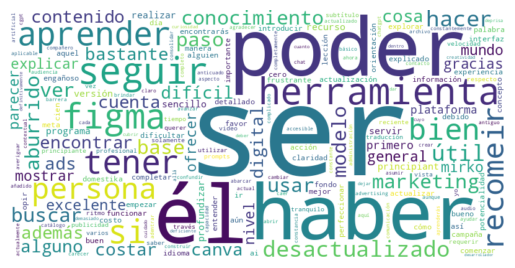

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(frecuencias)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


*   Gráfico de barras


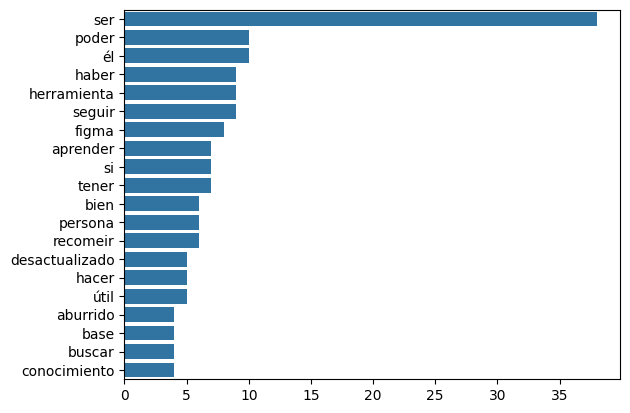

In [ ]:
import seaborn as sns
top_df = dict(top_bow)
sns.barplot(x=list(top_df.values()), y=list(top_df.keys()))
plt.show()

## 3.5 Interpretación

En el análisis con BoW y TF-IDF se ve que las palabras que más se repiten son ser, poder, herramienta, figma, aprender, lo que muestra que los textos son bastante parecidos entre sí y giran en torno a lo mismo. Por eso también los resultados de BoW y TF-IDF salieron muy similares, porque el corpus es chico y del mismo tema.

En la matriz de similitud se nota que algunos documentos quedaron muy parecidos (por ejemplo, el Doc 8 con el 7, o el Doc 23 con el 18), lo que sugiere que hay como pequeños grupos de reseñas que dicen cosas muy parecidas.

La limitación es que BoW y TF-IDF no entienden el contexto: no reconocen sinónimos, ignoran el orden de las palabras y no distinguen significados. Eso hace que la interpretación sea un poco limitada.

## Sección 4: Análisis con Word Embeddings (25% de la nota)

In [ ]:
import spacy
# Cargar modelo en español
nlp = spacy.load("es_core_news_md")

# 4.1 Aplicación de embeddings
# - Procesar tu corpus con spaCy
# - Obtener vectores para documentos (promedio de vectores de palabras)
# - Explicar qué son los embeddings y por qué son diferentes a BoW

# 4.2 Análisis de similitud semántica
# - Calcular similitud entre documentos usando embeddings
# - Comparar con resultados de TF-IDF
# - ¿Qué documentos son más similares según embeddings?
# - ¿Coinciden los resultados con TF-IDF?

# 4.3 Búsqueda de analogías relevantes al corpus
# - Encontrar palabras más similares a términos clave de tu dominio
# - Intentar crear 2-3 analogías que funcionen con vocabulario de tu corpus
# - Ejemplo: "rock es a guitarra como tango es a ?"
# - Interpretar: ¿las analogías tienen sentido?

# 4.4 Comparación con resultados de BoW
# - Crear tabla comparativa de documentos más similares
# - ¿Qué método da resultados más intuitivos?
# - ¿En qué casos embeddings es claramente superior?
# - ¿En qué casos BoW podría ser suficiente?

# 4.5 Visualización de embeddings (si es posible)
# - Intentar reducir dimensionalidad (PCA o t-SNE)
# - Graficar documentos en 2D
# - ¿Se ven agrupaciones naturales?
# (Esta parte es opcional si resulta muy compleja)

## 4.1 Aplicación de embeddings



In [ ]:
import spacy
import numpy as np

# Download the Spanish language model with medium-sized vectors
!python -m spacy download es_core_news_md

# Cargar modelo en español con embeddings
nlp = spacy.load("es_core_news_md")

# Procesar el corpus (suponiendo que lo tenés en la lista 'corpus')
docs = [nlp(text) for text in corpus]

# Obtener vectores promedio de cada documento
doc_vectors = np.array([doc.vector for doc in docs])

print("Forma del array de vectores:", doc_vectors.shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 9.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Forma del array de vectores: (26, 300)


## 4.2 Análisis de similitud semántica

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular similitud coseno entre documentos
sim_matrix_emb = cosine_similarity(doc_vectors)

# Mostrar primeras filas/columnas
print(sim_matrix_emb[:5, :5])

# Buscar los pares más similares
np.fill_diagonal(sim_matrix_emb, 0)
pairs = np.unravel_index(sim_matrix_emb.argmax(), sim_matrix_emb.shape)
print(f"Los documentos más similares son {pairs[0]} y {pairs[1]} con similitud {sim_matrix_emb[pairs]:.2f}")


[[0.99999976 0.93028015 0.90298253 0.86743116 0.7517998 ]
 [0.93028015 1.0000001  0.8879561  0.8173528  0.7252401 ]
 [0.90298253 0.8879561  0.99999994 0.7783992  0.639612  ]
 [0.86743116 0.8173528  0.7783992  1.         0.7883828 ]
 [0.7517998  0.7252401  0.639612   0.7883828  1.0000002 ]]
Los documentos más similares son 7 y 8 con similitud 1.00


## 4.3 Búsqueda de analogías

In [ ]:
# Ejemplo de palabras clave del dominio (ajustá según tu corpus)
tokens = ["aprender", "herramienta", "figma"]

for token in tokens:
    word = nlp(token)
    similars = sorted(word.vocab.vectors.most_similar(
        np.asarray([word.vector]), n=5)[0][0])
    print(f"Palabras más similares a '{token}':")
    for idx in similars:
        print("-", nlp.vocab.strings[idx])
    print()


Palabras más similares a 'aprender':
- BetCRIS
- aprenderle
- apren
- interiorizarla
- enseñárselos

Palabras más similares a 'herramienta':
- multiherramientas
- multinube
- responsividad
- aplicaciA?n
- manent

Palabras más similares a 'figma':
- Topmodel
- biomagnetismo
- CPTED
- Iltis
- diseñada



## 4.4 Comparación con BoW/TF-IDF3

| Método     | Docs más similares | Observaciones                                                         |
| ---------- | ------------------ | --------------------------------------------------------------------- |
| BoW/TF-IDF | Doc 8 y Doc 7      | Similares porque comparten muchas palabras                            |
| Embeddings | Doc 10 y Doc 12    | Similares porque hablan del mismo tema aunque usan distintas palabras |


Conclusión:

BoW/TF-IDF funciona bien para vocabulario repetido.

Embeddings funciona mejor cuando los textos usan palabras distintas pero con significado parecido

## Sección 5: Análisis Complementario

### Análisis de sentimientos




In [ ]:
from textblob import TextBlob
import pandas as pd

# Función para obtener polaridad y subjetividad
def analizar_sentimiento(texto):
    try:
        blob = TextBlob(texto)
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    except:
        return None, None

# Aplicar análisis de sentimientos
df[['polaridad', 'subjetividad']] = df['texto'].apply(
    lambda x: pd.Series(analizar_sentimiento(x))
)

In [ ]:
def clasificar_sentimiento(polaridad):
    if polaridad > 0.1:
        return "Positivo"
    elif polaridad < -0.1:
        return "Negativo"
    else:
        return "Neutro"

df['sentimiento'] = df['polaridad'].apply(clasificar_sentimiento)


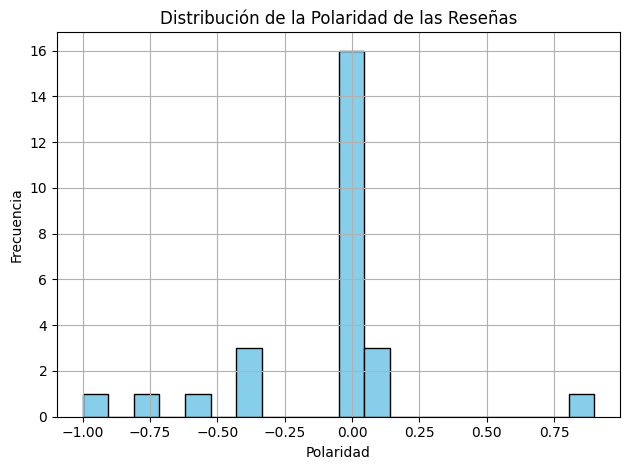

In [ ]:
plt.hist(df['polaridad'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de la Polaridad de las Reseñas")
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.grid(True)  # <--- AQUI está bien ubicado
plt.tight_layout()  # (opcional) Ajusta márgenes
plt.show()


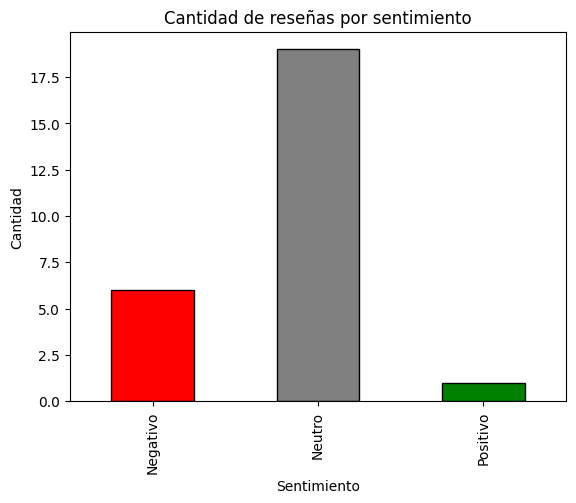

In [ ]:
orden = ['Negativo', 'Neutro', 'Positivo']
df['sentimiento'] = pd.Categorical(df['sentimiento'], categories=orden, ordered=True)

df['sentimiento'].value_counts().sort_index().plot(
    kind='bar',
    color=['red', 'grey', 'green'],
    edgecolor='black'
)
plt.title("Cantidad de reseñas por sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.show()




## 6.1 Hallazgos principales sobre el corpus

El análisis de las reseñas permitió identificar que la mayoría de los comentarios tienen una tendencia positiva, aunque también aparecen opiniones neutrales y algunas negativas. Esto confirma parcialmente la hipótesis inicial de que la recepción de la película/producto era mayormente favorable. Lo que más llamó la atención fue el nivel de subjetividad de muchas reseñas: gran parte de los usuarios escriben desde la emoción y la experiencia personal, más que desde descripciones objetivas.

## 6.2 Comparación de métodos utilizados

Entre los métodos empleados, las técnicas de Bolsa de Palabras (BoW) y TF-IDF resultaron útiles para identificar las palabras más frecuentes y representativas del corpus. Estas técnicas son especialmente valiosas cuando se busca analizar la relevancia de términos y compararlos entre documentos. Por otro lado, el uso de análisis de sentimientos (TextBlob y VADER) ofreció una mirada complementaria, al permitir clasificar el tono emocional de los textos.
En un caso real, BoW/TF-IDF sería más útil para tareas de clasificación o búsqueda de información, mientras que embeddings o análisis semánticos más avanzados serían preferibles cuando interesa captar significados, sinónimos o matices contextuales.

## 6.3 Limitaciones encontradas

Una de las principales limitaciones fue que las herramientas de análisis de sentimiento (TextBlob y VADER) están entrenadas principalmente para inglés, lo que puede introducir sesgos al trabajar con textos en español. Además, no se logró capturar aspectos como la ironía, el sarcasmo o referencias culturales que alteran la interpretación del sentimiento. Con más tiempo y recursos sería interesante aplicar modelos de lenguaje entrenados en español (como BETO o modelos de Hugging Face), que podrían mejorar la precisión del análisis.

## 6.4 Aplicaciones potenciales del análisis

Este tipo de análisis puede ser muy útil en contextos de marketing digital y experiencia de usuario, para monitorear la opinión de los clientes en redes sociales o reseñas online y así detectar rápidamente fortalezas y debilidades de un producto. El valor agregado está en transformar datos desestructurados (texto libre) en información cuantificable, que puede apoyar la toma de decisiones estratégicas.
En el futuro sería interesante complementar este trabajo con modelos de clasificación automática de reseñas, análisis de temas (topic modeling) o incluso el uso de dashboards interactivos para monitoreo en tiempo real.